In [12]:
import sys
sys.path.append('../')

In [13]:
%matplotlib widget

In [14]:
import numpy as np
import angle as model
from IPython.display import display, Markdown
import ipywidgets as widgets
from demo import *
from ipycanvas import Canvas
import matplotlib.pyplot as plt

Output()

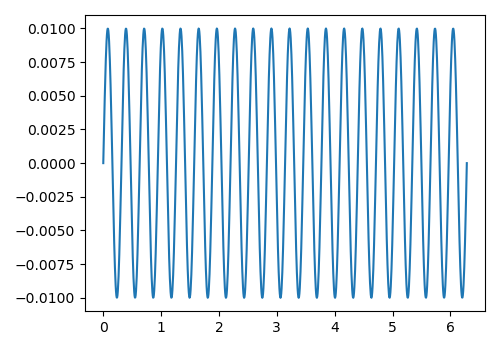

In [15]:
m = model.Angle(9, 3, 0.2)
c = model.AngleCanvas(m, L=100)
t = np.linspace(0, 2*pi, 1000)
y = m.start_angle.real() / m.circular_frequency().real() * np.sin(m.circular_frequency().real() * t)
demo = Demo(m.params, m, drawable=widgets.HBox([c.canvas]))
demo.show()
fig, ax = plt.subplots(figsize=(5,3.5))
ax.plot(t, y)
plt.tight_layout()